# Default of Credit Card Clients

## Table of Contents

- Introduction
- Data Processing
- Feature Engineering
- Model Training
- Model Evaluation

### Introduction

In this notebook, I will clean and analyze the given data and come up with a model that predicts whether a client will default the payment or not.

### Data Processing

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Read the data into a data frame
df = pd.read_excel('default of credit card clients.xls')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
# See what shape the data has
df.shape

(30001, 25)

In [5]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
Unnamed: 0    30001 non-null object
X1            30001 non-null object
X2            30001 non-null object
X3            29670 non-null object
X4            29678 non-null object
X5            30001 non-null object
X6            30001 non-null object
X7            30001 non-null object
X8            30001 non-null object
X9            30001 non-null object
X10           30001 non-null object
X11           30001 non-null object
X12           30001 non-null object
X13           30001 non-null object
X14           30001 non-null object
X15           30001 non-null object
X16           30001 non-null object
X17           30001 non-null object
X18           30001 non-null object
X19           30001 non-null object
X20           30001 non-null object
X21           30001 non-null object
X22           30001 non-null object
X23           30001 non-null object
Y             30001 non-nul

All columns have object data type.

We will change the names of the columns to be more meaningful.

In [6]:
# Changing column names
for column in df:
    df.rename(columns={column : df[column][0]}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Now we will drop the first row and reset the index to start counting from 0.

In [7]:
# Drop and reset
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)

We will change column names to lower case.

In [8]:
# Change column names to lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

In [10]:
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


We see here that there are very few null values. They can be either imputed or dropped.

In [11]:
# Checking different values for EDUCATION
df.education.value_counts()

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: education, dtype: int64

In [12]:
# Checking different values for MARRIAGE
df.marriage.value_counts()

single     15964
married    13659
0             54
Name: marriage, dtype: int64

Columns education and marriage have some meaningless values.

In [13]:
# Getting the number of null values
df.education.isnull().sum()

331

In [14]:
# Getting the mode of feature EDUCATION
education_mode = df.education.value_counts().index[0]
education_mode

'university'

In [15]:
# Replacing the 0 with Null to facilitate calculations
df.education.replace(0, np.nan, inplace=True)
# Filling the missing values with the mode
df.education.fillna(education_mode, inplace=True)
df.education.isnull().sum()

0

In [16]:
df.education.value_counts()

university         14375
graduate school    10585
high school         4916
others               124
Name: education, dtype: int64

In [17]:
# Getting the number of null values
df.marriage.isnull().sum()

323

In [18]:
# Getting the mode of feature MARRIAGE
marriage_mode = df.marriage.value_counts().index[0]
marriage_mode

'single'

In [19]:
# Replacing the 0 with Null to facilitate calculations
df.marriage.replace(0, np.nan, inplace=True)
# Filling the missing values with the mode
df.marriage.fillna(marriage_mode, inplace=True)
df.marriage.isnull().sum()

0

In [20]:
df.marriage.value_counts()

single     16341
married    13659
Name: marriage, dtype: int64

In [21]:
df.isna().sum()

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [22]:
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,4,2,63,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,30000,50000,female,university,single,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14375,16341,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


We will check if there are any duplicates

In [23]:
# Checking the sum of duplicate rows
df.duplicated().sum()

0

The are no duplicate rows in our dataset.

We will check the values of the rest of the columns

In [24]:
# checking values in sex column
df.sex.value_counts()

female    18112
male      11888
Name: sex, dtype: int64

In [25]:
# checking values in default_payment_next_month column
df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

We will change the data type of the numeric columns to int

In [26]:
# Changing columns data type
df[['id', 'limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3',
    'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 
   'default_payment_next_month']] = df[['id', 'limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
                                        'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',  
                                        'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 
   'default_payment_next_month']].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                            30000 non-null int64
limit_bal                     30000 non-null int64
sex                           30000 non-null object
education                     30000 non-null object
marriage                      30000 non-null object
age                           30000 non-null int64
pay_0                         30000 non-null int64
pay_2                         30000 non-null int64
pay_3                         30000 non-null int64
pay_4                         30000 non-null int64
pay_5                         30000 non-null int64
pay_6                         30000 non-null int64
bill_amt1                     30000 non-null int64
bill_amt2                     30000 non-null int64
bill_amt3                     30000 non-null int64
bill_amt4                     30000 non-null int64
bill_amt5                     30000 non-null int64
bill_amt6            

In [28]:
df.describe()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Also, there are outliers in age column.

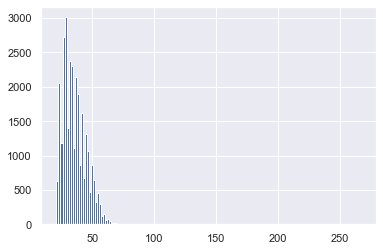

In [29]:
df.age.hist(bins=150);

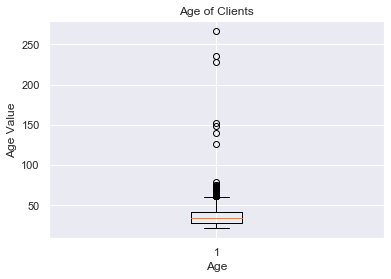

In [30]:
plt.boxplot(df.age);
plt.title('Age of Clients')
plt.xlabel('Age');
plt.ylabel('Age Value');

As shown in the box plot, there are outlier values which we will replace with the mean value.

In [31]:
# Replacing ages above 100 with the mean value
df.age = df.age.apply(lambda x : 35 if x > 100 else x)

In [32]:
# Checking the values after we removed the outliers
df.age.describe()

count    30000.000000
mean        35.483767
std          9.214986
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

### Feature Engineering

In this section, we will adjust the features to be used by the model.

In [33]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


We will drop the id column

In [34]:
# Dropping id column
# df.drop('id', axis=1, inplace=True)

Now we will normalize the numeric columns in our dataset so that all features lie in the same range.

In [35]:
# Using min max normalization method
def normalize(column):
    max_val = column.max()
    min_val = column.min()
    return column.apply(lambda x : (((x - min_val) / (max_val - min_val)) * (1 - 0)) + 0)

In [36]:
df.limit_bal = normalize(df.limit_bal)
df.pay_0 = normalize(df.pay_0)
df.pay_2 = normalize(df.pay_2)
df.pay_3 = normalize(df.pay_3)
df.pay_4 = normalize(df.pay_4)
df.pay_5 = normalize(df.pay_5)
df.pay_6 = normalize(df.pay_6)
df.bill_amt1 = normalize(df.bill_amt1)
df.bill_amt2 = normalize(df.bill_amt2)
df.bill_amt3 = normalize(df.bill_amt3)
df.bill_amt4 = normalize(df.bill_amt4)
df.bill_amt5 = normalize(df.bill_amt5)
df.bill_amt6 = normalize(df.bill_amt6)
df.pay_amt1 = normalize(df.pay_amt1)
df.pay_amt2 = normalize(df.pay_amt2)
df.pay_amt3 = normalize(df.pay_amt3)
df.pay_amt4 = normalize(df.pay_amt4)
df.pay_amt5 = normalize(df.pay_amt5)
df.pay_amt6 = normalize(df.pay_amt6)

In [37]:
df.describe()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,0.159075,35.483767,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,0.191846,...,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.221200
std,8660.398374,0.131058,9.214986,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,0.065159,...,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.415062
min,1.000000,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,0.040404,28.000000,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,0.149668,...,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.000000
50%,15000.500000,0.131313,34.000000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.166324,...,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,22500.250000,0.232323,41.000000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205887,...,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.000000
max,30000.000000,1.000000,79.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                            30000 non-null int64
limit_bal                     30000 non-null float64
sex                           30000 non-null object
education                     30000 non-null object
marriage                      30000 non-null object
age                           30000 non-null int64
pay_0                         30000 non-null float64
pay_2                         30000 non-null float64
pay_3                         30000 non-null float64
pay_4                         30000 non-null float64
pay_5                         30000 non-null float64
pay_6                         30000 non-null float64
bill_amt1                     30000 non-null float64
bill_amt2                     30000 non-null float64
bill_amt3                     30000 non-null float64
bill_amt4                     30000 non-null float64
bill_amt5                     30000 non-null float

In [39]:
df.marriage.value_counts()

single     16341
married    13659
Name: marriage, dtype: int64

We will perform one-hot encoding on categorical features.

In [40]:
df_label = df[['id', 'default_payment_next_month']]
df.drop('default_payment_next_month', axis=1, inplace=True)

# One-hot encoding on categorical features
df[['female', 'male']] = pd.get_dummies(df.sex).astype('int64')
df[['graduate_school', 'high_school', 'other', 'university']] = pd.get_dummies(df.education).astype('int64')
df[['married', 'single']] = pd.get_dummies(df.marriage).astype('int64')
df.drop(['sex', 'education', 'marriage'], axis=1, inplace=True)

# One-hot encoding on age
df.age = df.age.apply(lambda x : 0 if x < 60 else 1)
df[['under_60', 'over_60']] = pd.get_dummies(df.age).astype('int64')

df = df.merge(df_label, on='id', copy=False)
df.drop(['id', 'age'], axis=1, inplace=True)

In [41]:
df.head()

,limit_bal,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,...,male,graduate_school,high_school,other,university,married,single,under_60,over_60,default_payment_next_month
0,0.010101,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,...,0,0,0,0,1,1,0,1,0,1
1,0.111111,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,...,0,0,0,0,1,0,1,1,0,1
2,0.080808,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,...,0,0,0,0,1,0,1,1,0,0
3,0.040404,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,...,0,0,0,0,1,1,0,1,0,0
4,0.040404,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,...,1,0,0,0,1,1,0,1,0,0


In [42]:
df.columns

Index(['limit_bal', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
       'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5',
       'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'female', 'male', 'graduate_school', 'high_school', 'other',
       'university', 'married', 'single', 'under_60', 'over_60',
       'default_payment_next_month'],
      dtype='object')

In [43]:
df.corr()

,limit_bal,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,...,male,graduate_school,high_school,other,university,married,single,under_60,over_60,default_payment_next_month
limit_bal,1.000000,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,...,-0.024755,0.258777,-0.139678,0.026196,-0.147398,0.103701,-0.103701,-0.016723,0.016723,-0.153520
pay_0,-0.271214,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,...,0.057643,-0.142720,0.058906,-0.027707,0.096429,-0.016314,0.016314,-0.013952,0.013952,0.324794
pay_2,-0.296382,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,...,0.070771,-0.169215,0.064585,-0.034030,0.118376,-0.022525,0.022525,-0.001111,0.001111,0.263551
pay_3,-0.286123,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,...,0.066096,-0.160209,0.062303,-0.030991,0.111062,-0.030584,0.030584,0.003648,-0.003648,0.235253
pay_4,-0.267460,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,...,0.060173,-0.152402,0.058370,-0.032280,0.106673,-0.030167,0.030167,0.004974,-0.004974,0.216614
pay_5,-0.249411,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,...,0.055064,-0.138709,0.049560,-0.028881,0.099667,-0.034081,0.034081,0.003630,-0.003630,0.204149
pay_6,-0.235195,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,...,0.044008,-0.125123,0.041351,-0.024805,0.092231,-0.031772,0.031772,-0.000382,0.000382,0.186866
bill_amt1,0.285430,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,...,0.033642,-0.024045,-0.021959,0.002676,0.038926,0.025264,-0.025264,-0.020431,0.020431,-0.019644
bill_amt2,0.278314,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,...,0.031183,-0.020334,-0.022718,-0.001935,0.036531,0.022429,-0.022429,-0.020448,0.020448,-0.014193
bill_amt3,0.283236,0.179785,0.224146,0.227494,0.244983,0.243335,0.241181,0.892279,0.928326,1.000000,...,0.024563,-0.013112,-0.022763,-0.002132,0.029682,0.025946,-0.025946,-0.020484,0.020484,-0.014076


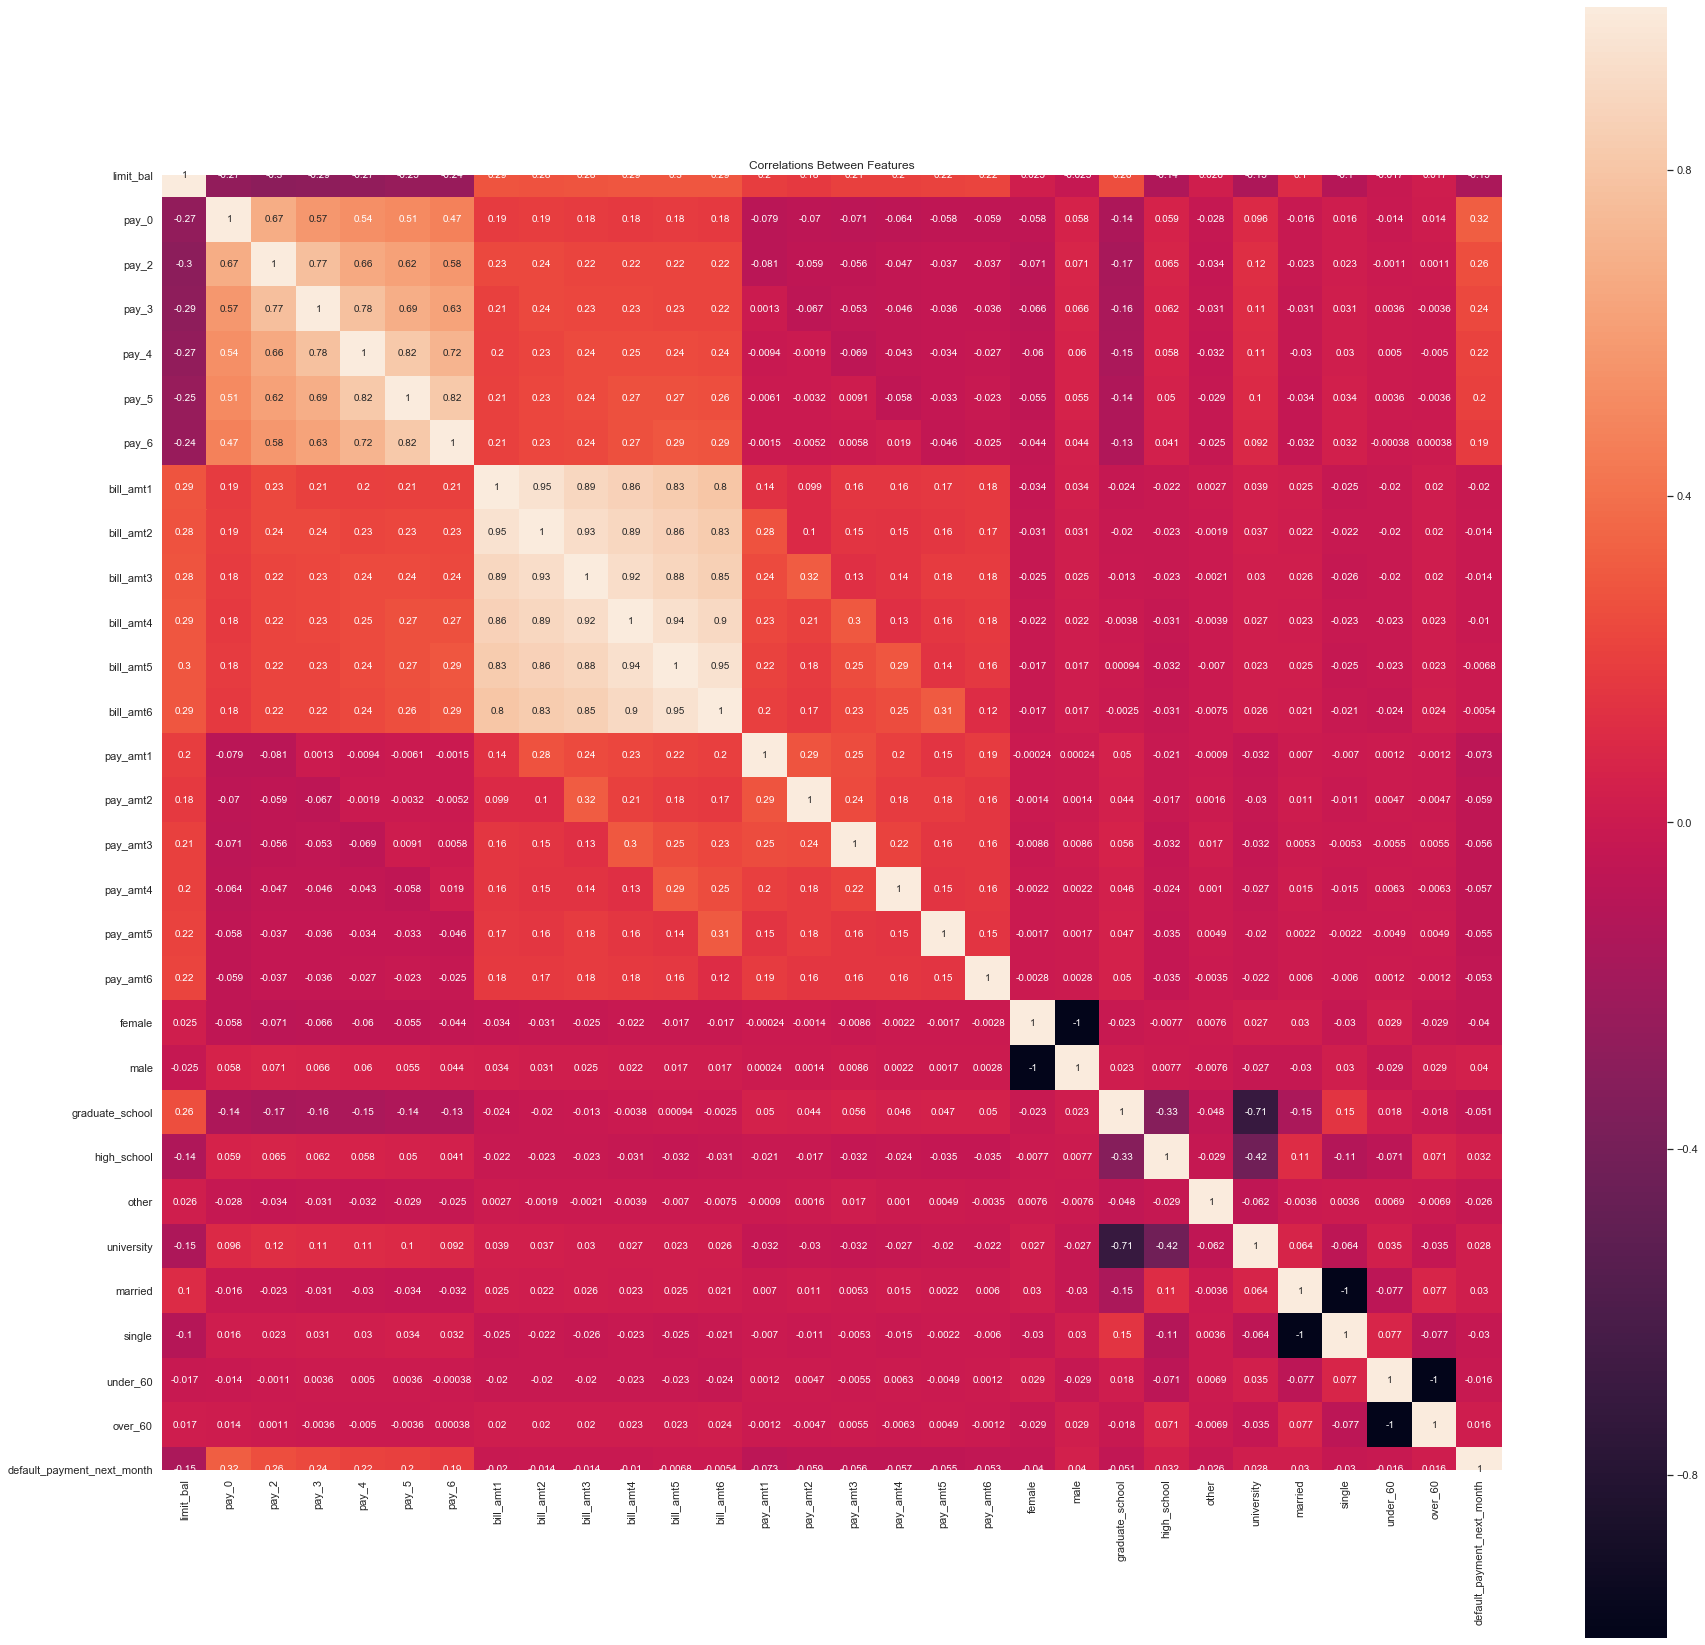

In [44]:
# Drawing a heatmap
plt.figure(figsize=(30, 30));
sns.heatmap(df.corr(), square=True, annot = True)
plt.title('Correlations Between Features');

There is high correlation between bill_am1 and bill_amt2, and between bill_amt5 and bill_amt6, so one of them will be dropped.

In [45]:
# Removing columns with high correlations
# Removing one column from each feature that was hot encoded
df.drop(['bill_amt2', 'bill_amt5', 'female', 'married', 'other', 'over_60'], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 24 columns):
limit_bal                     30000 non-null float64
pay_0                         30000 non-null float64
pay_2                         30000 non-null float64
pay_3                         30000 non-null float64
pay_4                         30000 non-null float64
pay_5                         30000 non-null float64
pay_6                         30000 non-null float64
bill_amt1                     30000 non-null float64
bill_amt3                     30000 non-null float64
bill_amt4                     30000 non-null float64
bill_amt6                     30000 non-null float64
pay_amt1                      30000 non-null float64
pay_amt2                      30000 non-null float64
pay_amt3                      30000 non-null float64
pay_amt4                      30000 non-null float64
pay_amt5                      30000 non-null float64
pay_amt6                      30000 non-nul

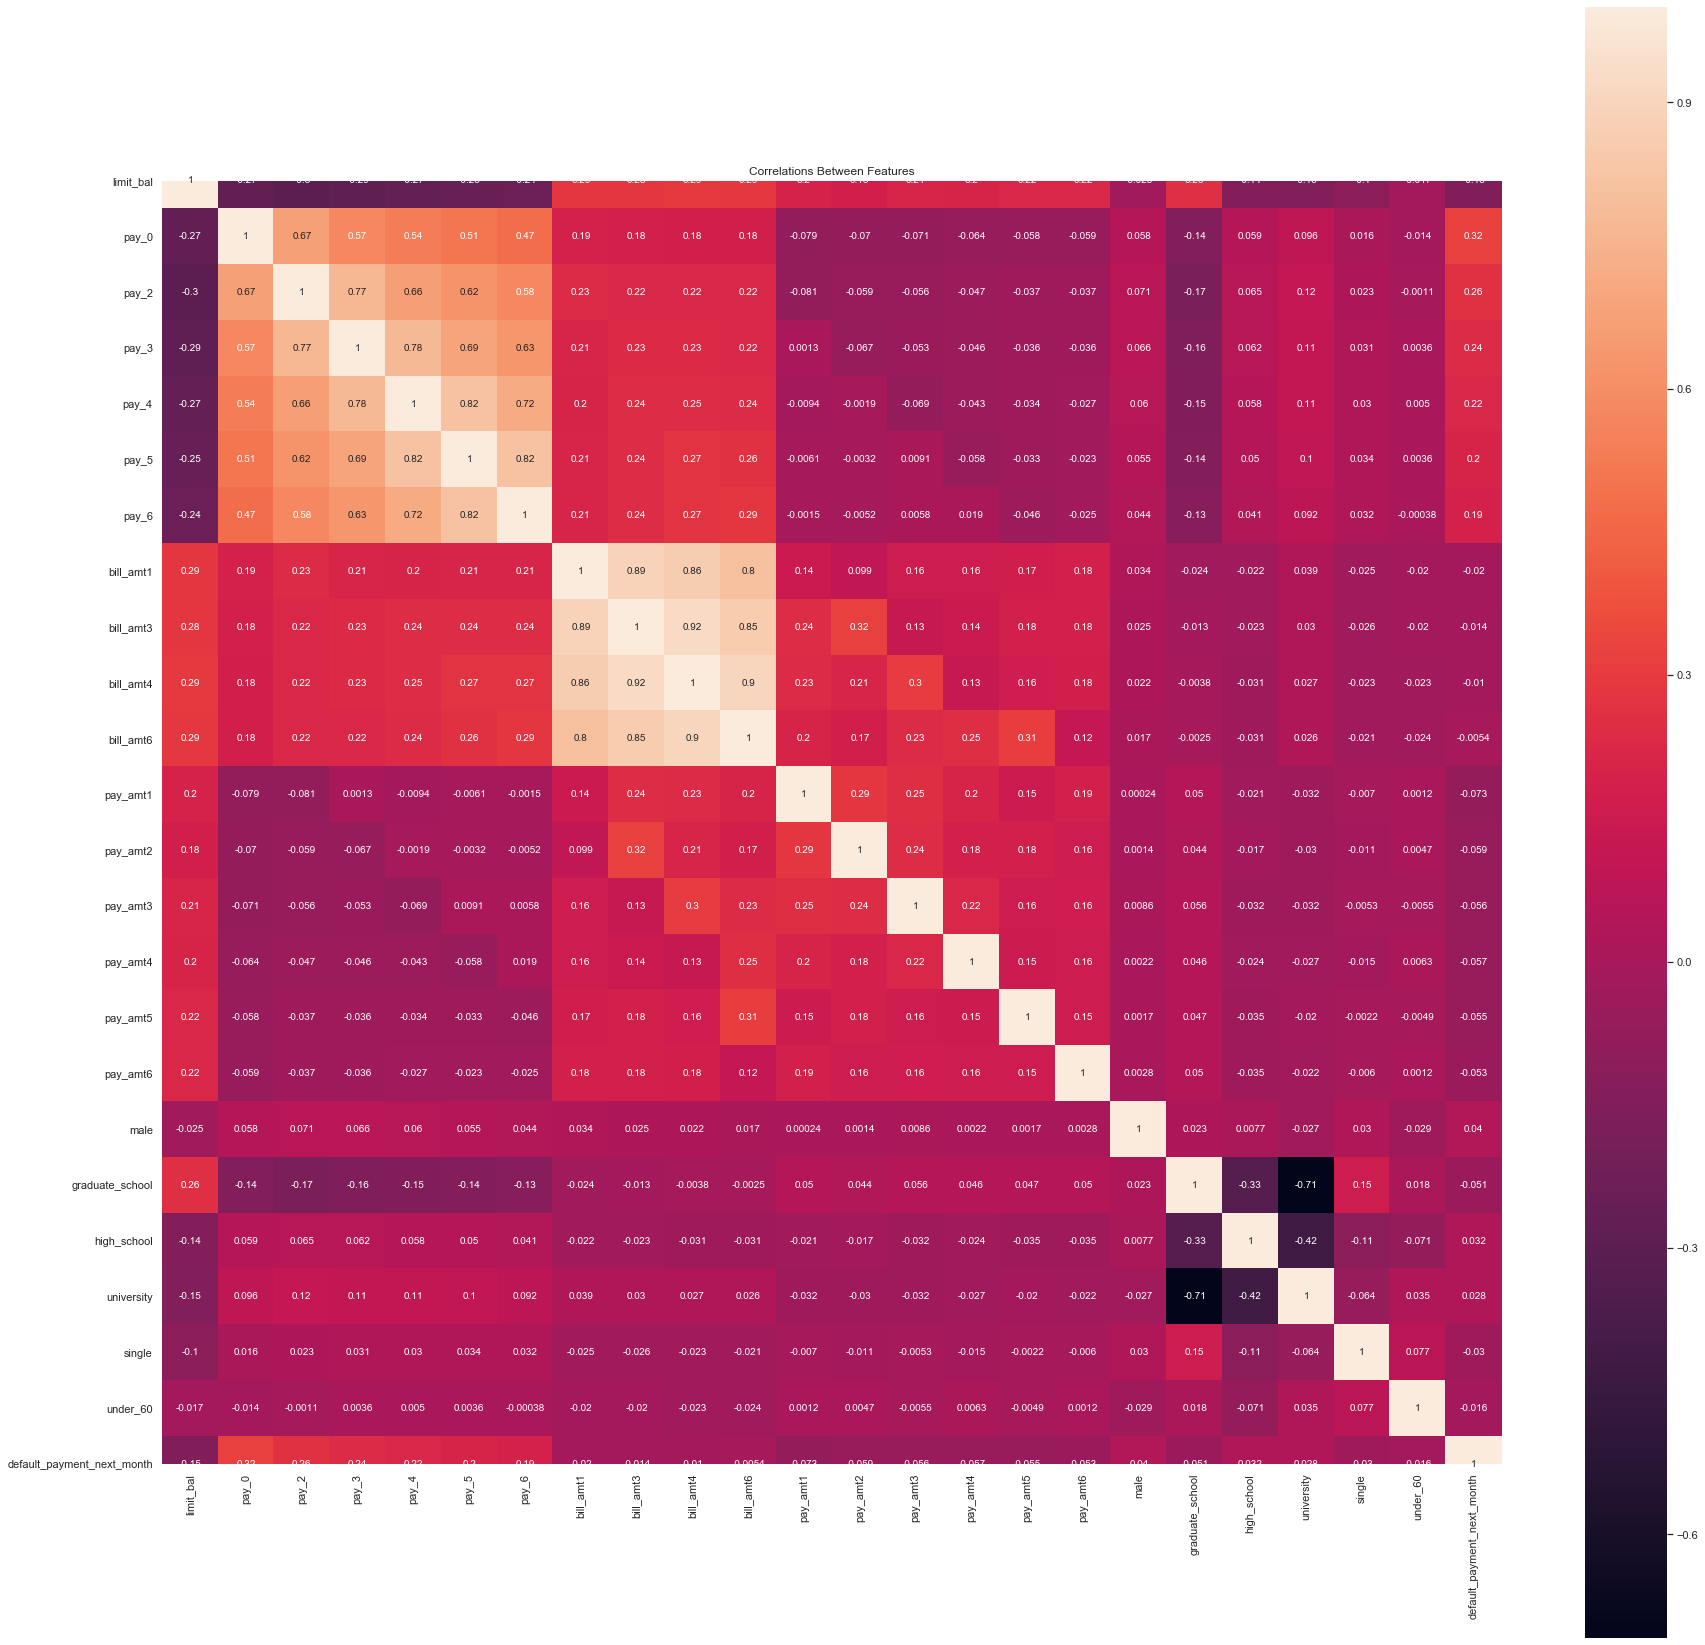

In [47]:
plt.figure(figsize=(30, 30));
sns.heatmap(df.corr(), square=True, annot = True)
plt.title('Correlations Between Features');

### Model Training

In this section we will create the mode and train it. We will use randomforest 

In [48]:
# conda update -n base -c defaults conda
# conda update -c conda-forge scikit-learn
# pip install xgboost

In [49]:
# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [50]:
# Creating train, validation, and test sets
x = df.drop('default_payment_next_month', axis=1)
y = df.default_payment_next_month

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=0.5)

We will use RandomForestClassifier model.

In [51]:
# Creating and training the model
model = RandomForestClassifier(n_jobs=2)
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2)

In [52]:
y_val_pred = model.predict(x_validation)

In [53]:
model.score(x_train, y_train)

0.9960952380952381

In [54]:
model.score(x_validation, y_validation)

0.8166666666666667

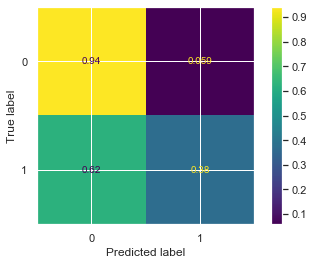

In [55]:
# Confusion matrix
plot_confusion_matrix(estimator=model, X=x_validation, y_true=y_validation, normalize='true');

We will try to use another model.

We will use xgboost.

In [56]:
# Create and train a different model
model_2 = xgb.XGBClassifier(max_depth=20, n_estimators=100, gamma=4, objective='binary:logistic', eval_metric='rmse', eta=0.1, 
                           use_label_encoder=False)
model_2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='rmse', gamma=4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [57]:
model_2.score(x_train, y_train)

0.9044285714285715

In [58]:
model_2.score(x_validation, y_validation)

0.82

### Model Tuning

We will try to change the model hyperparameters and see whether it has an effect on the model's accuracy, precision, or recall.

In [59]:
# Create an evaluation set
eval_set = [(x_validation, y_validation)]

In [138]:
# Tune the model's hyperparamteres and train again
model_2 = xgb.XGBClassifier(max_depth=15, n_estimators=50, gamma=2, objective='binary:logistic', eval_metric='error', 
                            eta=0.35, n_jobs=4, min_child_weight=4, subsample=0.9, colsample_bytree=0.9, 
                            scale_pos_weight=1, reg_lambda=3, use_label_encoder=False)
model_2.fit(x_train, y_train, eval_set=eval_set, eval_metric='error', verbose=True)

[0]	validation_0-error:0.19711
[1]	validation_0-error:0.18844
[2]	validation_0-error:0.18756
[3]	validation_0-error:0.18667
[4]	validation_0-error:0.18578
[5]	validation_0-error:0.18622
[6]	validation_0-error:0.18467
[7]	validation_0-error:0.18511
[8]	validation_0-error:0.18667
[9]	validation_0-error:0.18489
[10]	validation_0-error:0.18622
[11]	validation_0-error:0.18733
[12]	validation_0-error:0.18778
[13]	validation_0-error:0.18756
[14]	validation_0-error:0.18689
[15]	validation_0-error:0.18733
[16]	validation_0-error:0.18778
[17]	validation_0-error:0.18556
[18]	validation_0-error:0.18667
[19]	validation_0-error:0.18578
[20]	validation_0-error:0.18756
[21]	validation_0-error:0.18822
[22]	validation_0-error:0.18978
[23]	validation_0-error:0.19200
[24]	validation_0-error:0.19067
[25]	validation_0-error:0.19111
[26]	validation_0-error:0.19089
[27]	validation_0-error:0.19022
[28]	validation_0-error:0.19178
[29]	validation_0-error:0.19267
[30]	validation_0-error:0.19156
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eta=0.35,
              eval_metric='error', gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.349999994,
              max_delta_step=0, max_depth=15, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=3,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [139]:
model_2.score(x_train, y_train)

0.9292857142857143

In [140]:
model_2.score(x_test, y_test)

0.8006666666666666

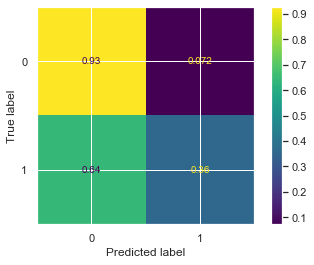

In [141]:
# Confusion matrix
plot_confusion_matrix(estimator=model_2, X=x_test, y_true=y_test, normalize='true');

In [142]:
y_pred_test = model_2.predict(x_test)

In [143]:
acc = accuracy_score(y_test, y_pred_test)
pre = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
print('Model accuracy: {}'.format(acc))
print('Model precision: {}'.format(pre))
print('Model recall: {}'.format(rec))

Model accuracy: 0.8006666666666666
Model precision: 0.5895765472312704
Model recall: 0.35948361469712015


As we can see from the previouse cell and from the confusion matrix, the model has 79 ~ 80 % accuracy, 53% precision, and 46% recall.

This is indicates that the model is biased because the dataset is also biased.